In [1]:
from datascience import *
import numpy as np
path_data = '../assets/data/'
np.set_printoptions(threshold=50)

# 6.1. Sorting Rows (행 정렬)

In [2]:
# read table
nba_salaries = Table.read_table(path_data + 'nba_salaries.csv')
nba_salaries

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


기본적으로 10개 행을 출력한다. 총 행은 407 + 10 = 417 행이다.

In [3]:
nba_salaries.show(3)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625


`.show()`를 통해 원하는 만큼 불러올 수 있다. 이 역시 3 + 414 = 417 행이다.

In [4]:
# 컬럼에서 정렬
nba_salaries.sort('PLAYER').show(5)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12


In [7]:
# 컬럼 명 변경
nba = nba_salaries.relabeled("'15-'16 SALARY", 'SALARY')
nba.sort('SALARY')

PLAYER,POSITION,TEAM,SALARY
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Jordan McRae,SG,Phoenix Suns,0.049709
Cory Jefferson,PF,Phoenix Suns,0.049709
Elliot Williams,SG,Memphis Grizzlies,0.055722
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
Keith Appling,PG,Orlando Magic,0.061776
Sean Kilpatrick,SG,Denver Nuggets,0.099418
Erick Green,PG,Utah Jazz,0.099418
Jeff Ayres,PF,Los Angeles Clippers,0.111444


`.sort()`는 기본적으로 오름차순 정렬이다. descending = True를 이용해 내림차순 정렬을 할 수 있다.

In [9]:
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


# Selecting Rows (행 선택)

### Specified Rows (지정된 행)

In [ ]:
# 0번 행 선택
nba.take(0)

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


In [ ]:
# np.arange()를 이용한 행 선택
nba.take(np.arange(3, 6))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


In [14]:
# SALARY가 가장 높은 5명의 선수 선택
# SALARY 기준으로 내림차순 정렬 후 5개 선택
nba.sort('SALARY', descending=True).take(np.arange(5))

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


### Rows Corresponding to a Specified Feature (지정된 특성에 해당하는 행)

연봉이 10달러 이상인 선수들을 모아 보고싶다.

In [15]:
nba.where('SALARY', are.above(10))

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Joe Johnson,SF,Brooklyn Nets,24.8949
Thaddeus Young,PF,Brooklyn Nets,11.236
Al Jefferson,C,Charlotte Hornets,13.5
Nicolas Batum,SG,Charlotte Hornets,13.1253
Kemba Walker,PG,Charlotte Hornets,12
Derrick Rose,PG,Chicago Bulls,20.0931
Jimmy Butler,SG,Chicago Bulls,16.4075
Joakim Noah,C,Chicago Bulls,13.4


`are.above(10)` 를 통해 연봉이 10 이상인 선수는 총 69명인 것을 알 수 있다.

In [16]:
nba.where('SALARY', are.above(10)).sort('SALARY')

PLAYER,POSITION,TEAM,SALARY
DeMar DeRozan,SG,Toronto Raptors,10.05
Gerald Wallace,SF,Philadelphia 76ers,10.1059
Luol Deng,SF,Miami Heat,10.1516
Monta Ellis,SG,Indiana Pacers,10.3
Wilson Chandler,SF,Denver Nuggets,10.4494
Brendan Haywood,C,Cleveland Cavaliers,10.5225
Jrue Holiday,PG,New Orleans Pelicans,10.5955
Tyreke Evans,SG,New Orleans Pelicans,10.7346
Marcin Gortat,C,Washington Wizards,11.2174
Thaddeus Young,PF,Brooklyn Nets,11.236


그렇다면 특정 선수, Stephen Curry의 정보를 알아보자.

In [17]:
nba.where('PLAYER', are.equal_to('Stephen Curry'))

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


In [20]:
nba.where('TEAM', are.equal_to('Golden State Warriors')).show()

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


`.show()`를 사용하지 않으면 기본적으로 10개의 행을 출력한다. `show()`를 붙이면 전체 행을 모두 출력한다.

In [ ]:
# 두 코드는 동일한 결과를 출력한다.
# nba.where('TEAM', are.equal_to('Denver Nuggets')
nba.where('TEAM', 'Denver Nuggets')

PLAYER,POSITION,TEAM,SALARY
Danilo Gallinari,SF,Denver Nuggets,14
Kenneth Faried,PF,Denver Nuggets,11.236
Wilson Chandler,SF,Denver Nuggets,10.4494
JJ Hickson,C,Denver Nuggets,5.6135
Jameer Nelson,PG,Denver Nuggets,4.345
Will Barton,SF,Denver Nuggets,3.53333
Emmanuel Mudiay,PG,Denver Nuggets,3.10224
Darrell Arthur,PF,Denver Nuggets,2.814
Jusuf Nurkic,C,Denver Nuggets,1.842
Joffrey Lauvergne,C,Denver Nuggets,1.70972


### Multiple Features (중복 특성)

포지션이 포인트가드이고, 연봉이 15달러 이상인 선수들을 출력해보자

In [24]:
nba.where('POSITION', 'PG').where('SALARY', are.above(15))

PLAYER,POSITION,TEAM,SALARY
Derrick Rose,PG,Chicago Bulls,20.0931
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
Chris Paul,PG,Los Angeles Clippers,21.4687
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
John Wall,PG,Washington Wizards,15.852


### General Form (일반적인 형태)

`original_table_name.where(column_label_string, are.condition)`

In [25]:
nba.where('SALARY', are.between(10, 10.3))

PLAYER,POSITION,TEAM,SALARY
Luol Deng,SF,Miami Heat,10.1516
Gerald Wallace,SF,Philadelphia 76ers,10.1059
Danny Green,SG,San Antonio Spurs,10
DeMar DeRozan,SG,Toronto Raptors,10.05


존재하지 않는 특성에 대해서는 다음과 같다.

In [26]:
nba.where('PLAYER', are.equal_to('AS'))

PLAYER,POSITION,TEAM,SALARY


### Some More Conditions (그 외)

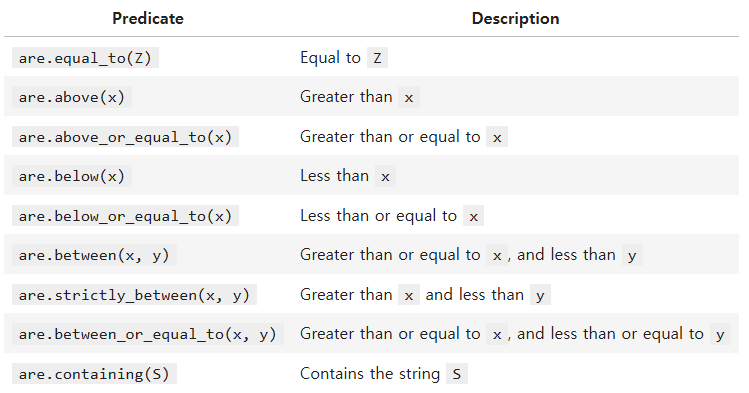

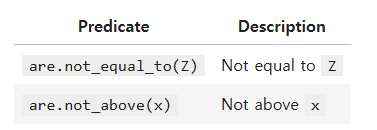

In [28]:
# 팀명에 Warriors가 들어간 팀 선수 출력
nba.where('TEAM', are.containing('Warriors')).show()

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


In [30]:
# 포지션에 G가 들어간 선수 출력
nba.where('POSITION', are.containing('G'))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452
Jason Richardson,SG,Atlanta Hawks,0.947276
Lamar Patterson,SG,Atlanta Hawks,0.525093
Terran Petteway,SG,Atlanta Hawks,0.525093
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Marcus Smart,PG,Boston Celtics,3.43104


In [ ]:
# 클리브랜드 팀 소속이 아닌 선수들 중에서 연봉이 20 아래가 아닌 선수들
other_than_Cavs = nba.where('TEAM', are.not_equal_to('Cleveland Cavaliers'))
other_than_Cavs.where('SALARY', are.not_below(20))

PLAYER,POSITION,TEAM,SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


In [34]:
# 같은 결과도 다른 방식으로 표현할 수 있다.
other_than_Cavs.where('SALARY', are.above_or_equal_to(20))

PLAYER,POSITION,TEAM,SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586
